## This document will show our main work in full.

### Part 1: Data Preprocessing

#### 1.1 Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os

#### 1.2 Prepare the data

In [ ]:
df= pd.read_csv('pre-processing final/vdjdb.csv') # Import the dataset
df = df[['complex.id','gene', 'cdr3', 'v.segm', 'j.segm', 'species', 'mhc.a', 'mhc.b', 'mhc.class', 'antigen.epitope', 'vdjdb.score']] # Select the necessary columns
df = df.dropna()    # Drop the missing values
df.drop_duplicates(inplace=True)   # Drop the duplicates
df = df[df['vdjdb.score'] != 0]  # Drop the rows with score 0
df.head()

#### 1.3 Combine the alpha and beta chains

In [ ]:
df = df[df['complex.id'] != 0] # remove the rows with complex.id = 0
df_alpha = df[df['gene'] == 'TRA'].copy()
df_beta = df[df['gene'] == 'TRB'].copy()
# Extract alpha chains into a separate DataFrame and rename the columns
df_alpha = df_alpha.rename(columns={
    'cdr3': 'cdr3_a', 'v.segm': 'v.segm_a', 'j.segm': 'j.segm_a'
}).drop(['gene', 'mhc.a', 'mhc.b', 'antigen.epitope','species'], axis=1) # remove the columns that may cause confilct
# Extract beta chains into a separate DataFrame and rename the columns
df_beta = df_beta.rename(columns={
    'cdr3': 'cdr3_b', 'v.segm': 'v.segm_b', 'j.segm': 'j.segm_b'
}).drop('gene', axis=1)
# Combine the rows with the same complex.id
df_combine = pd.merge(df_alpha, df_beta, on='complex.id', how='inner')
# Discard duplicate columns
df_combine = df_combine[['complex.id', 'cdr3_a', 'cdr3_b', 'v.segm_a', 'v.segm_b', 'j.segm_a', 'j.segm_b', 'species', 'antigen.epitope']]
df_combine.head()

In [ ]:
# Split the data into human and mouse
human = df_combine[df_combine['species'] == 'HomoSapiens']
mouse = df_combine[df_combine['species'] == 'MusMusculus']
human_alpha = human[['cdr3_a', 'v.segm_a', 'j.segm_a', 'antigen.epitope']]
human_beta = human[['cdr3_b', 'v.segm_b', 'j.segm_b', 'antigen.epitope']]
mouse_alpha = mouse[['cdr3_a', 'v.segm_a', 'j.segm_a', 'antigen.epitope']]
mouse_beta = mouse[['cdr3_b', 'v.segm_b', 'j.segm_b', 'antigen.epitope']]

### Part 2: Dimensionality Reduction

#### 2.1 Importing the necessary libraries

In [ ]:
import seaborn as sns
from umap import UMAP
import matplotlib.pyplot as plt
from encoders.GIANA_encoder import GIANA_encoder_pd

#### 2.2 Dimensionality Reduction for Human Data

In [ ]:
GIANA_encoder_pd(human_alpha, ['alpha'])
GIANA_encoder_pd(human_beta, ['beta'])
GIANA_encoder_pd(human, ['alpha', 'beta'])
reducer = UMAP(random_state=42) # Initialize the UMAP model
human_encoded_2d = reducer.fit_transform(np.array(human['encoded_cdr3'].tolist())) # Fit the model to the data
reducer = UMAP(random_state=42)
human_alpha_encoded_2d = reducer.fit_transform(np.array(human_alpha['encoded_cdr3'].tolist()))
reducer = UMAP(random_state=42)
human_beta_encoded_2d = reducer.fit_transform(np.array(human_beta['encoded_cdr3'].tolist()))

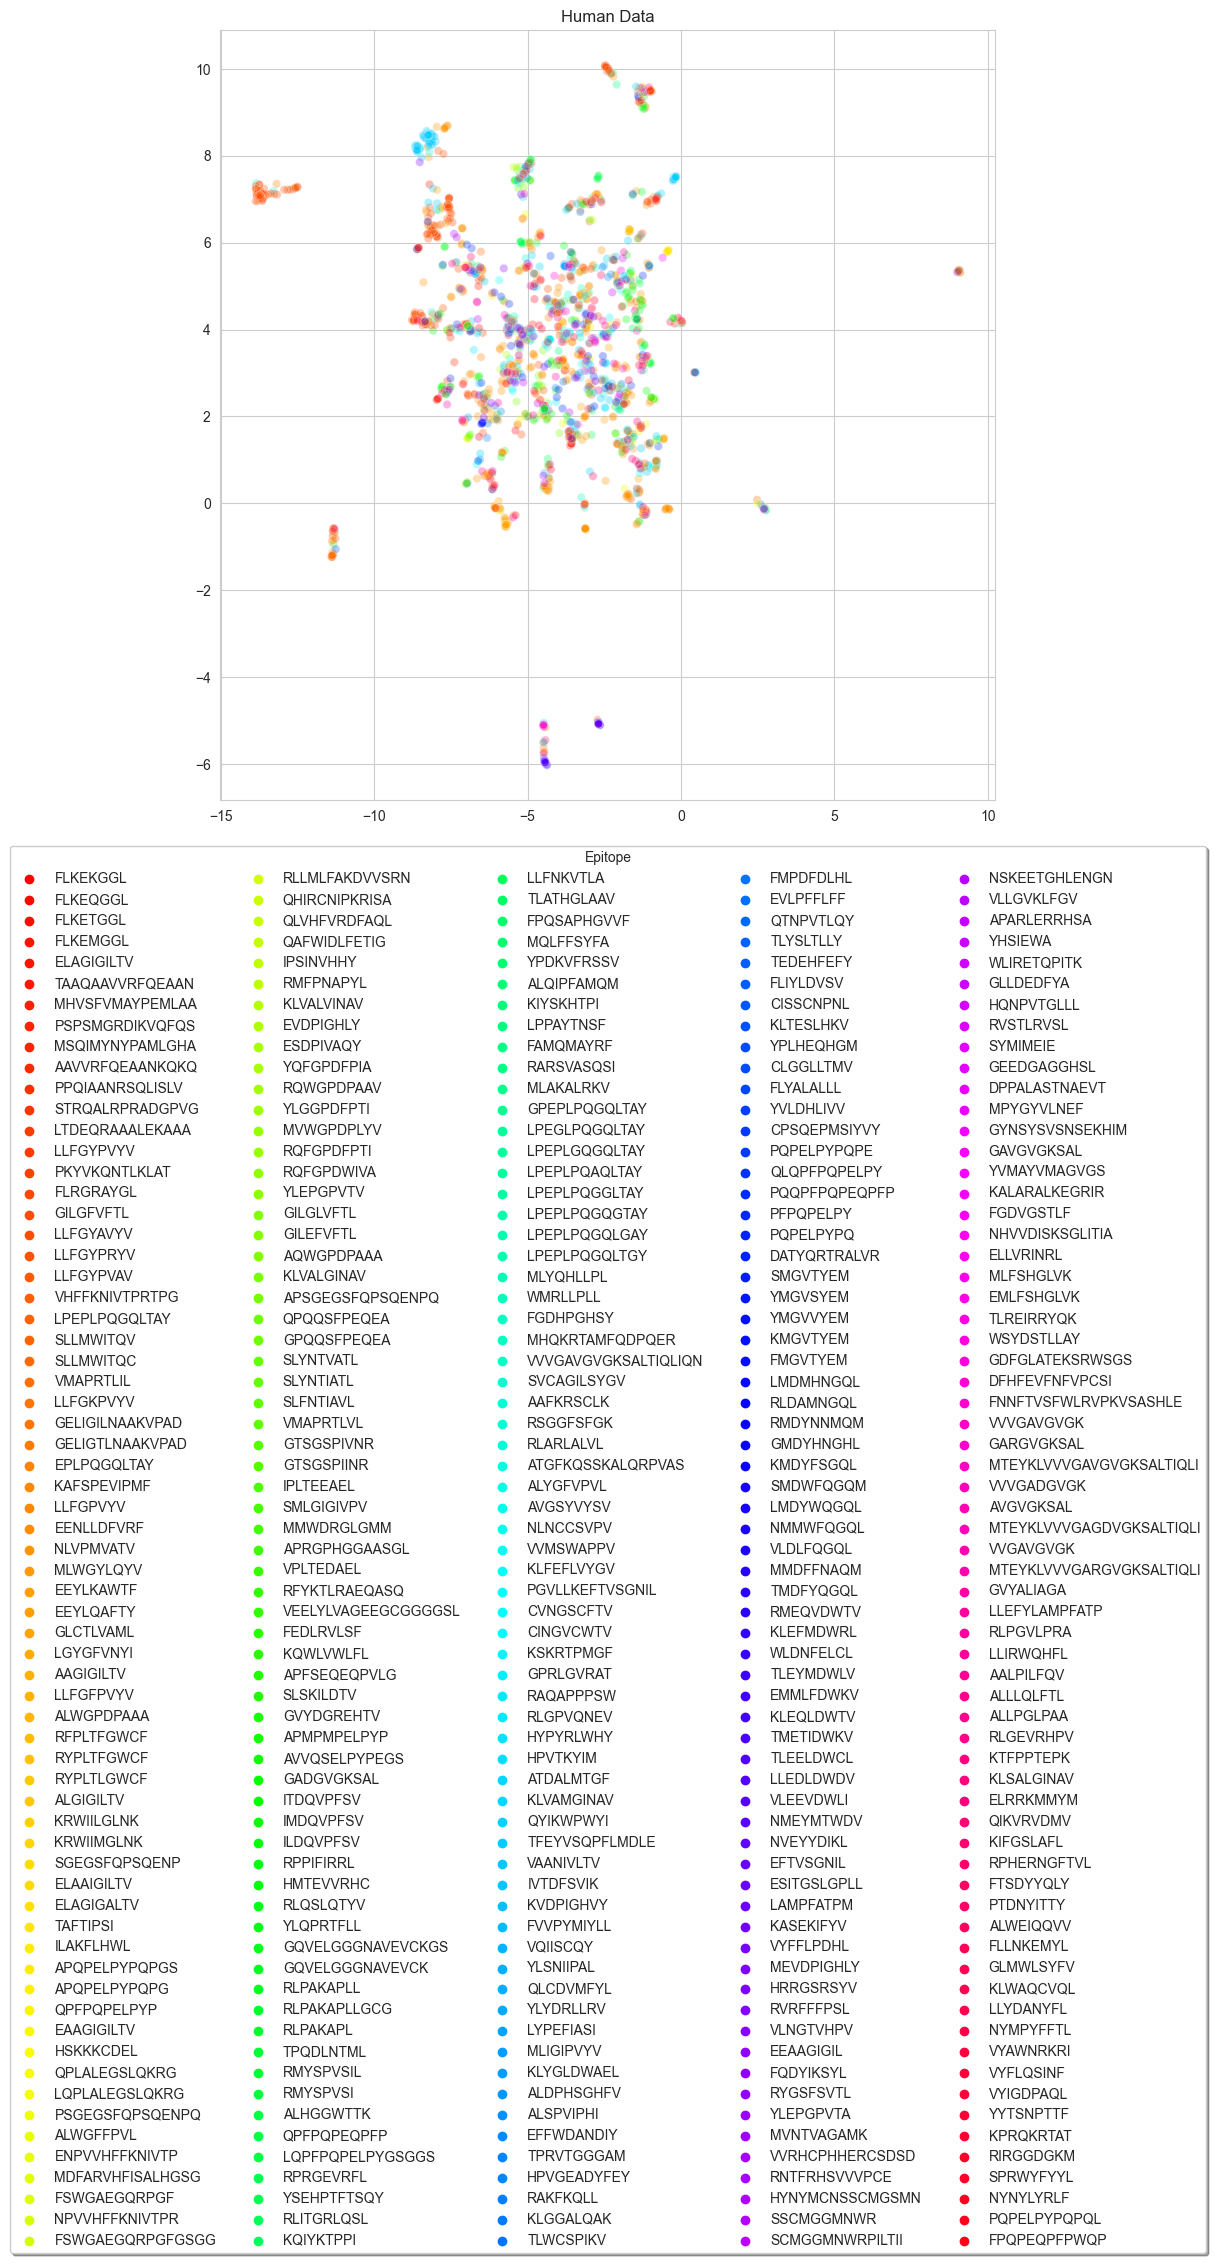

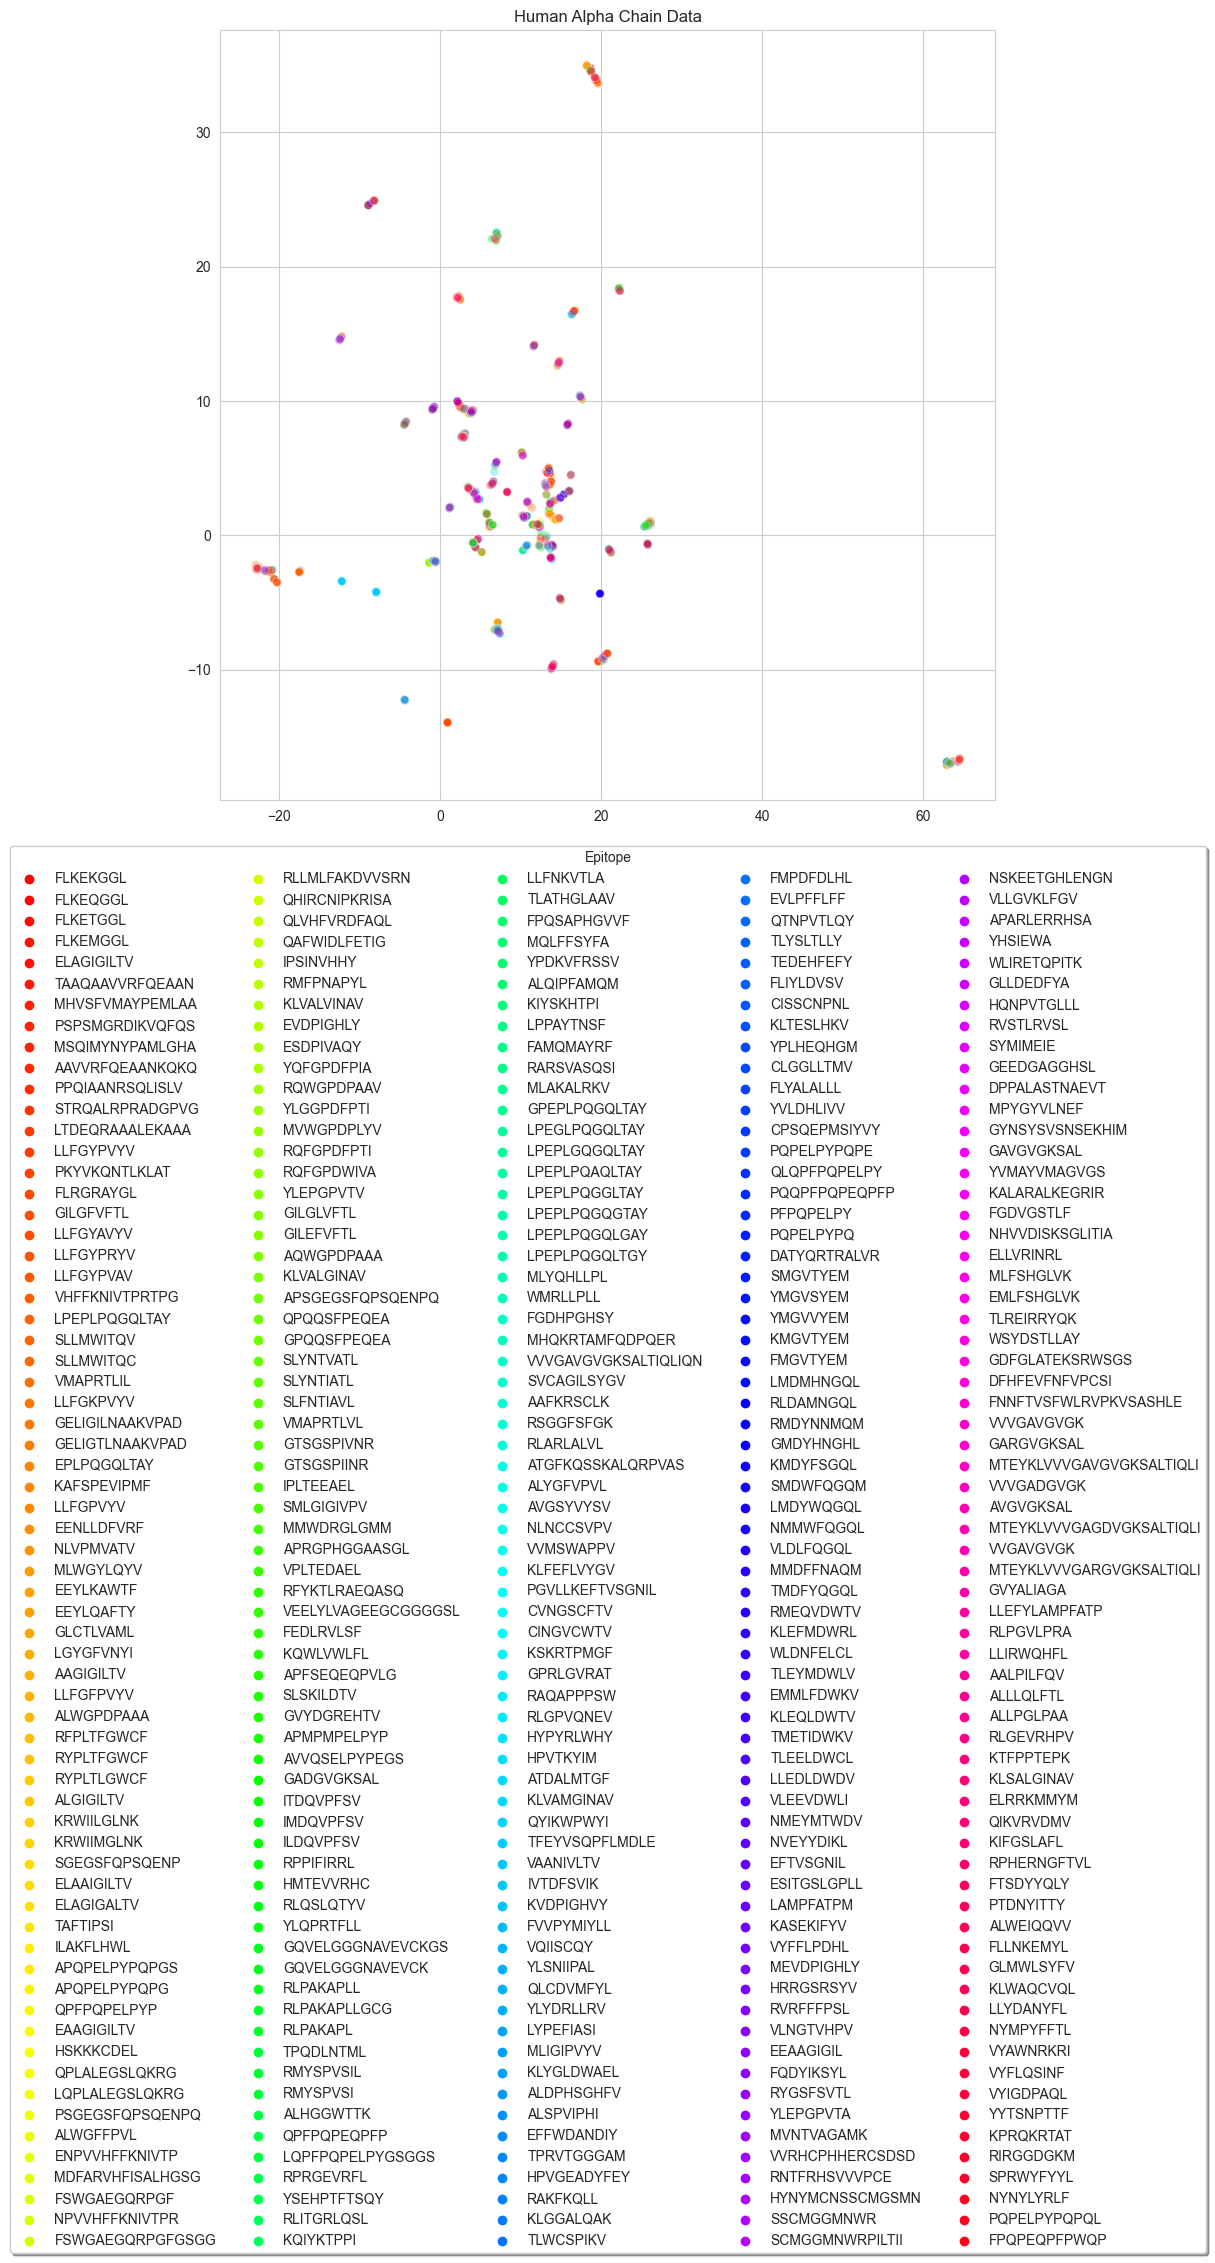

Text(0.5, 1.0, 'Human Beta Chain Data')

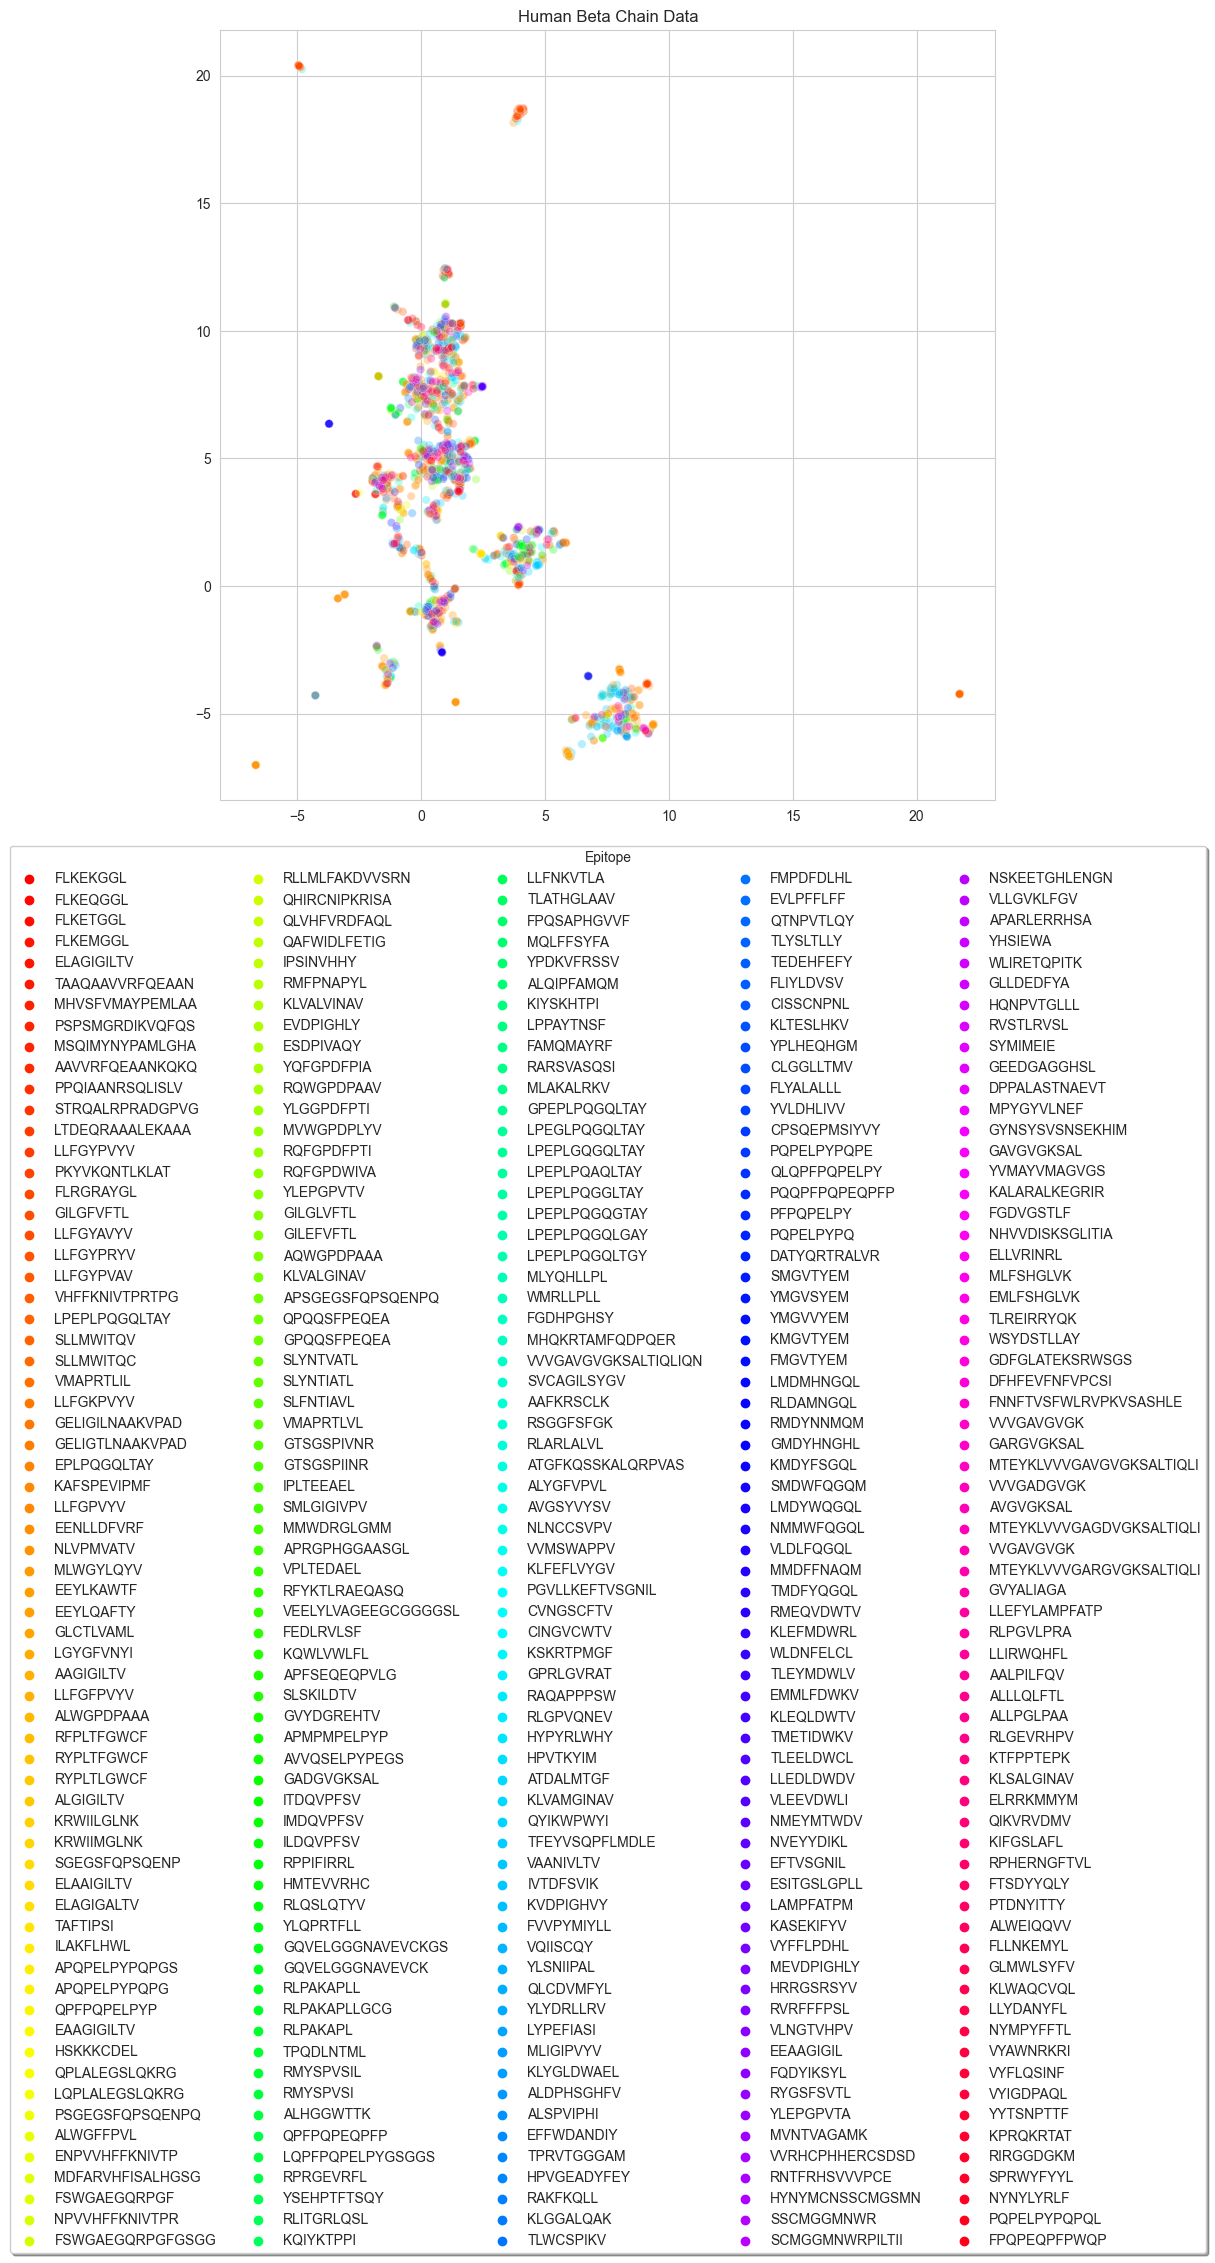

In [18]:
# Plot the results
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=human_encoded_2d[:,0], y=human_encoded_2d[:,1],
    hue=human['antigen.epitope'],
    palette=sns.color_palette("hsv", len(human['antigen.epitope'].unique())),
    alpha=0.3
)
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.title('Human Data')
plt.show()
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=human_alpha_encoded_2d[:,0], y=human_alpha_encoded_2d[:,1],
    hue=human_alpha['antigen.epitope'],
    palette=sns.color_palette("hsv", len(human_alpha['antigen.epitope'].unique())),
    alpha=0.3
)
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.title('Human Alpha Chain Data')
plt.show()
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=human_beta_encoded_2d[:,0], y=human_beta_encoded_2d[:,1],
    hue=human_beta['antigen.epitope'],
    palette=sns.color_palette("hsv", len(human_beta['antigen.epitope'].unique())),
    alpha=0.3
)
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.title('Human Beta Chain Data')
plt.show()

#### 2.3 Dimensionality Reduction for Mouse Data

In [19]:
GIANA_encoder_pd(mouse_alpha, ['alpha'])
GIANA_encoder_pd(mouse_beta, ['beta'])
GIANA_encoder_pd(mouse, ['alpha', 'beta'])
reducer = UMAP(random_state=42) # Initialize the UMAP model
mouse_encoded_2d = reducer.fit_transform(np.array(mouse['encoded_cdr3'].tolist())) # Fit the model to the data
reducer = UMAP(random_state=42)
mouse_alpha_encoded_2d = reducer.fit_transform(np.array(mouse_alpha['encoded_cdr3'].tolist()))
reducer = UMAP(random_state=42)
mouse_beta_encoded_2d = reducer.fit_transform(np.array(mouse_beta['encoded_cdr3'].tolist()))

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Program Files (x86)\python39\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
D:\Program Files (x86)\python39\lib\site-packages\umap

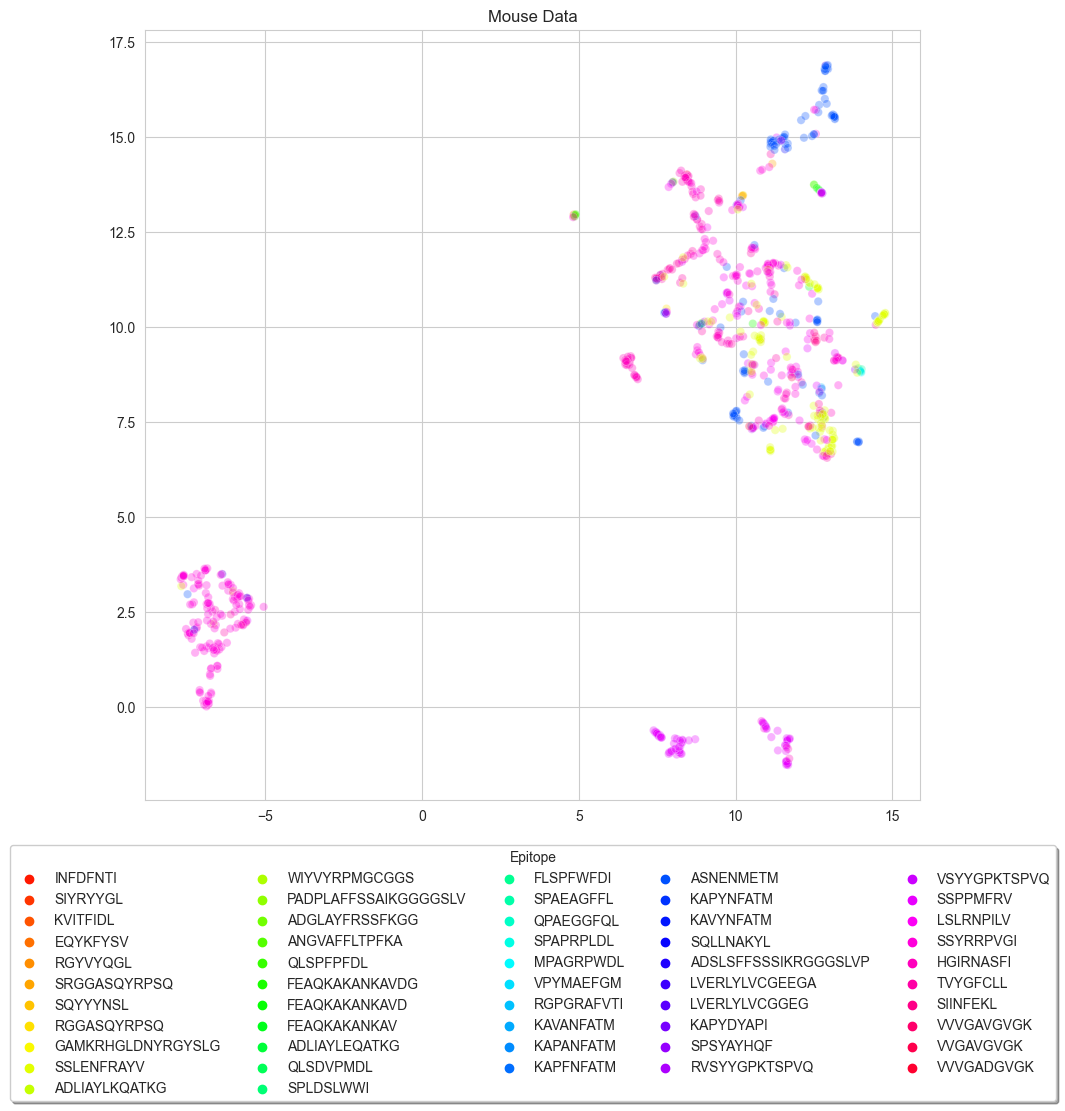

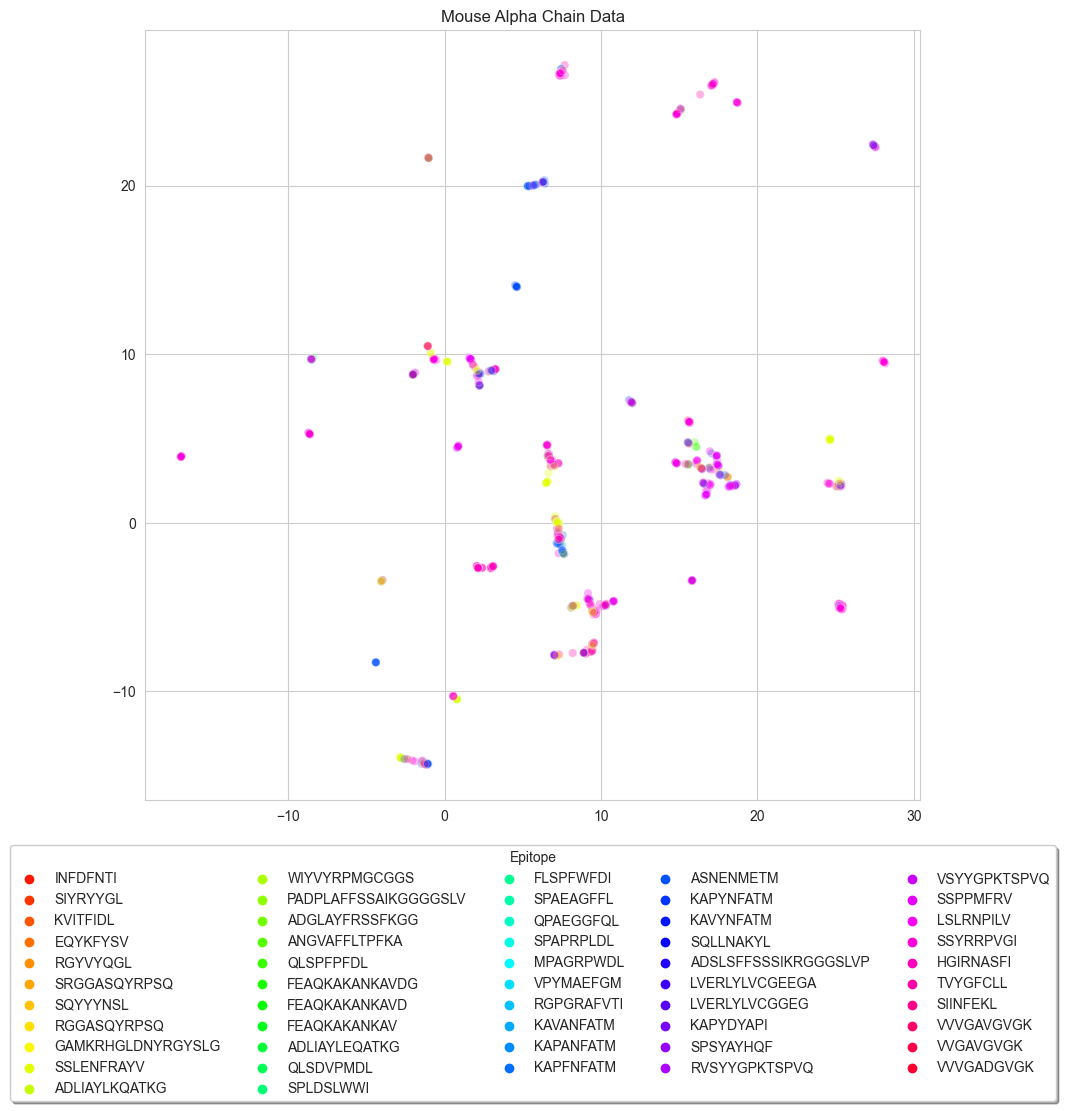

In [20]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=mouse_encoded_2d[:,0], y=mouse_encoded_2d[:,1],
    hue=mouse['antigen.epitope'],
    palette=sns.color_palette("hsv", len(mouse['antigen.epitope'].unique())),
    alpha=0.3
)
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.title('Mouse Data')
plt.show()
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=mouse_alpha_encoded_2d[:,0], y=mouse_alpha_encoded_2d[:,1],
    hue=mouse_alpha['antigen.epitope'],
    palette=sns.color_palette("hsv", len(mouse_alpha['antigen.epitope'].unique())),
    alpha=0.3
)
plt.legend(title='Epitope', loc='upper center', bbox_to_anchor=(0.5, -0.05),
           fancybox=True, shadow=True, ncol=5)
plt.title('Mouse Alpha Chain Data')
plt.show()

### Part 3: Clustering

#### 3.1 Importing the necessary libraries

In [23]:
from tcrdist.repertoire import TCRrep
from clustering.cluster_tools import pure_clusters_fraction, pure_cluster_retention
from sklearn.cluster import DBSCAN
from sklearn.metrics import normalized_mutual_info_score

#### 3.2 Necessary preprocessing for TCRDist

In [65]:
from tcrdist.repertoire import TCRrep
human_TCRDist = human.rename(columns={'cdr3_a': 'cdr3_a_aa', 'cdr3_b': 'cdr3_b_aa','v.segm_a':'v_a_gene','v.segm_b':'v_b_gene'}).drop('encoded_cdr3', axis=1)
mouse_TCRDist = mouse.rename(columns={'cdr3_a': 'cdr3_a_aa', 'cdr3_b': 'cdr3_b_aa','v.segm_a':'v_a_gene','v.segm_b':'v_b_gene'}).drop('encoded_cdr3', axis=1)

#### 3.3 Clustering for Human Data

In [66]:
tr = TCRrep(cell_df = human_TCRDist, 
            organism = 'human', 
            chains = ['alpha', 'beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = False
            )

human_matrix = tr.pw_cdr3_a_aa


D:\Program Files (x86)\python39\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Program Files (x86)\python39\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


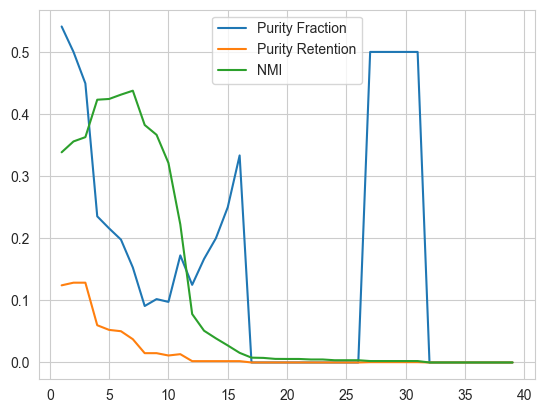

In [67]:
eps_list = [i for i in np.arange(1, 40, 1)]

purity_fraction = []
purity_retention = []
nmi=[]

for eps in eps_list:
    cluster = DBSCAN(eps=eps, min_samples=4, metric='precomputed')
    cluster.fit(human_matrix)

    purity_fraction.append(pure_clusters_fraction(cluster.labels_, human_alpha['antigen.epitope']))
    purity_retention.append(pure_cluster_retention(cluster.labels_, human_alpha['antigen.epitope']))
    nmi.append(normalized_mutual_info_score(human_alpha['antigen.epitope'], cluster.labels_))

plt.plot(eps_list, purity_fraction, label='Purity Fraction')
plt.plot(eps_list, purity_retention, label='Purity Retention')
plt.plot(eps_list, nmi, label='NMI')
plt.legend()
plt.show()

In [68]:
# SET eps=3
cluster = DBSCAN(eps=3, min_samples=4, metric='precomputed')
cluster.fit(human_matrix)
print('Purity Fraction:', pure_clusters_fraction(cluster.labels_, human['antigen.epitope']))
print('Purity Retention:', pure_cluster_retention(cluster.labels_, human['antigen.epitope']))
print('NMI:', normalized_mutual_info_score(human['antigen.epitope'], cluster.labels_))

Purity Fraction: 0.4492753623188406
Purity Retention: 0.1284796573875803
NMI: 0.36279977876044833


#### 3.4 Clustering for Mouse Data

In [69]:
tr = TCRrep(cell_df = mouse_TCRDist, 
            organism = 'mouse', 
            chains = ['alpha', 'beta'], 
            db_file = 'alphabeta_gammadelta_db.tsv',
            deduplicate = False
            )
mouse_matrix = tr.pw_cdr3_a_aa

D:\Program Files (x86)\python39\lib\site-packages\tcrdist\repertoire.py:159: UserWarning: cell_df needs a counts column to track clonal number of frequency

  self._validate_cell_df()
D:\Program Files (x86)\python39\lib\site-packages\tcrdist\repertoire.py:791: UserWarning: No 'count' column provided; count column set to 1
  warnings.warn("No 'count' column provided; count column set to 1")


In [71]:
cluster = DBSCAN(eps=3, min_samples=4, metric='precomputed')
cluster.fit(mouse_matrix)
print('Purity Fraction:', pure_clusters_fraction(cluster.labels_, mouse['antigen.epitope']))
print('Purity Retention:', pure_cluster_retention(cluster.labels_, mouse['antigen.epitope']))
print('NMI:', normalized_mutual_info_score(mouse['antigen.epitope'], cluster.labels_))

Purity Fraction: 0.6428571428571429
Purity Retention: 0.22172949002217296
NMI: 0.3858030999541238


### Part 4: Classification

#### 4.1 Importing the necessary libraries

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from Miscellaneous.tcr_sampler import remove_imbalance
from sklearn.preprocessing import LabelEncoder
from encoders.GIANA_encoder import GIANA_encoder_pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [110]:
df= pd.read_csv('pre-processing final/vdjdb.csv')
df.drop(['reference.id','method','meta','cdr3fix','web.method','web.method.seq','web.cdr3fix.nc','web.cdr3fix.unmp'], axis=1, inplace=True)
df.dropna(subset=['v.segm','j.segm','antigen.gene'], inplace=True)
df.drop_duplicates(inplace=True)
df.rename(columns={'antigen.epitope': 'epitope'}, inplace=True)
df = remove_imbalance(df, 10) # Remove the epitopes with less than 10 samples

#### 4.2 Processing for Human Data

In [126]:
human= df[df['species']=='HomoSapiens']
# drop the columns are not needed
human.drop(['species','complex.id'], axis=1, inplace=True)
human_alpha = human[human['gene']=='TRA'].drop(['gene','vdjdb.score'], axis=1)
human_beta = human[human['gene']=='TRB'].drop(['gene','vdjdb.score'], axis=1)
human_alpha.rename(columns={"antigen.species": "species", 'antigen.gene': 'gene','cdr3':'cdr3_a'}, inplace=True)
human_beta.rename(columns={"antigen.species": "species", 'antigen.gene': 'gene','cdr3':'cdr3_b'}, inplace=True)

D:\Program Files (x86)\python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [127]:
# encode the categorical columns
label_encoder = LabelEncoder()
human_alpha.loc[:,'gene_encoded'] = LabelEncoder().fit_transform(human_alpha['gene'])
human_alpha.loc[:,'species_encoded'] = LabelEncoder().fit_transform(human_alpha['species'])
human_alpha.loc[:,'mhc.a_encoded'] = LabelEncoder().fit_transform(human_alpha['mhc.a'])
human_alpha.loc[:,'mhc.b_encoded'] = LabelEncoder().fit_transform(human_alpha['mhc.b'])
human_alpha['mhc.class_encoded'] = human_alpha['mhc.class'].map({'MHCI': 0, 'MHCII': 1})
human_alpha.loc[:,'v.segm_encoded'] = LabelEncoder().fit_transform(human_alpha['v.segm'])
human_alpha.loc[:,'j.segm_encoded'] = LabelEncoder().fit_transform(human_alpha['j.segm'])
human_alpha['epitope_encoded'] = label_encoder.fit_transform(human_alpha['epitope'])
# encode the cdr3 sequences
GIANA_encoder_pd(human_alpha, ['alpha'])
human_alpha.drop(['cdr3_a','epitope','v.segm','j.segm','mhc.a','mhc.b','mhc.class','gene'], axis=1, inplace=True)
# normalize the data
scaler = MinMaxScaler()
human_alpha.loc[:,'gene_encoded'] = scaler.fit_transform(human_alpha['gene_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'species_encoded'] = scaler.fit_transform(human_alpha['species_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'mhc.a_encoded'] = scaler.fit_transform(human_alpha['mhc.a_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'mhc.b_encoded'] = scaler.fit_transform(human_alpha['mhc.b_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'mhc.class_encoded'] = scaler.fit_transform(human_alpha['mhc.class_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'v.segm_encoded'] = scaler.fit_transform(human_alpha['v.segm_encoded'].values.reshape(-1, 1))
human_alpha.loc[:,'j.segm_encoded'] = scaler.fit_transform(human_alpha['j.segm_encoded'].values.reshape(-1, 1))
# combine the features
human_alpha_feature = human_alpha.apply(lambda x: np.concatenate([x['encoded_cdr3'], np.array([x['gene_encoded'], x['species_encoded'], x['mhc.a_encoded'], x['mhc.b_encoded'], x['mhc.class_encoded'], x['v.segm_encoded'], x['j.segm_encoded']])]), axis=1)
feature_cols = ['feature' + str(i) for i in range(len(human_alpha_feature[0]))]
human_alpha_feature = pd.DataFrame(human_alpha_feature.tolist(), columns=feature_cols)
epitopes=human_alpha['epitope_encoded']
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(human_alpha_feature, epitopes, test_size=0.2, random_state=42)

In [128]:
# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       0.68      0.60      0.64        25
          10       0.58      0.91      0.71       341
          11       0.00      0.00      0.00         8
          12       0.61      0.64      0.63        42
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       1.00      0.50      0.67         6
          17       0.00      0.00      0.00         3
          18       0.62      0.21      0.31        24
          19       1.00    

D:\Program Files (x86)\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files (x86)\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files (x86)\python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files (x86)\python39\lib\site-p

In [129]:
# SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       0.75      0.12      0.21        25
          10       0.43      0.73      0.54       341
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        42
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       1.00      0.50      0.67         6
          17       0.00      0.00      0.00         3
          18       1.00      0.04      0.08        24
          19       0.00    

In [130]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)
# Define the parameters grid to sample from
param_distributions = {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # The number of parameter settings sampled. n_iter trades off runtime vs quality of the solution.
    cv=3,  # Number of folds in cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1,
    random_state=42
)
# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)
# Print the best parameters and the best score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


D:\Program Files (x86)\python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Best Score: 0.9126081019572144


In [131]:
# Random Forest
rf_clf = RandomForestClassifier(n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=30, bootstrap=True, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         1
           4       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       0.96      0.96      0.96        25
          10       0.76      0.92      0.84       341
          11       0.00      0.00      0.00         8
          12       0.61      0.88      0.72        42
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          16       1.00      0.50      0.67         6
          17       0.00      0.00      0.00         3
          18       1.00      0.96      0.98        24
          19       1.00    